In [17]:
# Based on https://www.kaggle.com/benhamner/d/uciml/iris/python-data-visualizations/notebook
# First, we'll import pandas, a data processing and CSV file I/O library
import pandas as pd
import numpy as np

# We'll also import seaborn, a Python graphing library
import warnings # current version of seaborn generates a bunch of warnings that we'll ignore
warnings.filterwarnings("ignore")
import seaborn as sns

import matplotlib.pyplot as plt
sns.set(style="white", color_codes=True)
%matplotlib inline

# Next, we'll load the train and test dataset, which is in the "data" directory
train = pd.read_csv("data/train.csv") # the train dataset is now a Pandas DataFrame
test = pd.read_csv("data/test.csv") # the train dataset is now a Pandas DataFrame

# Let's see what's in the trainings data - Jupyter notebooks print the result of the last thing you do
train.head()


,ID,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,...,saldo_medio_var33_hace2,saldo_medio_var33_hace3,saldo_medio_var33_ult1,saldo_medio_var33_ult3,saldo_medio_var44_hace2,saldo_medio_var44_hace3,saldo_medio_var44_ult1,saldo_medio_var44_ult3,var38,TARGET
0,1,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,39205.170000,0
1,3,2,34,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,49278.030000,0
2,4,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,67333.770000,0
3,8,2,37,0.0,195.0,195.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,64007.970000,0
4,10,2,39,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,117310.979016,0


In [4]:
# happy customers have TARGET==0, unhappy custormers have TARGET==1
# A little less then 4% are unhappy => unbalanced dataset
df = pd.DataFrame(train.TARGET.value_counts())
df['Percentage'] = 100*df['TARGET']/train.shape[0]
df

,TARGET,Percentage
0,73012,96.043147
1,3008,3.956853


# var3: nationality of the customer

In [5]:
# Top-10 most common values
train.var3.value_counts()[:10]

 2         74165
 8           138
-999999      116
 9           110
 3           108
 1           105
 13           98
 7            97
 4            86
 12           85
Name: var3, dtype: int64

In [6]:
# 116 values in column var3 are -999999
# var3 is suspected to be the nationality of the customer
# -999999 would mean that the nationality of the customer is unknown
train.loc[train.var3==-999999].shape

(116, 371)

In [7]:
# Replace -999999 in var3 column with most common value 2 
# See https://www.kaggle.com/cast42/santander-customer-satisfaction/debugging-var3-999999
# for details
train = train.replace(-999999,2)
train.loc[train.var3==-999999].shape

(0, 371)

# Add feature that counts the number of zeros in a row

In [8]:
X = train.iloc[:,:-1]
y = train.TARGET

X['n0'] = (X==0).sum(axis=1)
train['n0'] = X['n0']

# num_var4 : number of bank products

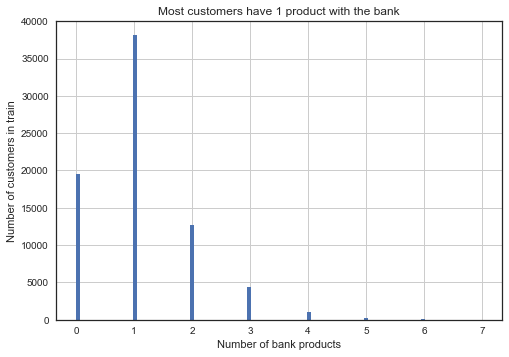

In [9]:
# According to dmi3kno (see https://www.kaggle.com/cast42/santander-customer-satisfaction/exploring-features/comments#115223)
# num_var4 is the number of products. Let's plot the distribution:
train.num_var4.hist(bins=100)
plt.xlabel('Number of bank products')
plt.ylabel('Number of customers in train')
plt.title('Most customers have 1 product with the bank')
plt.show()

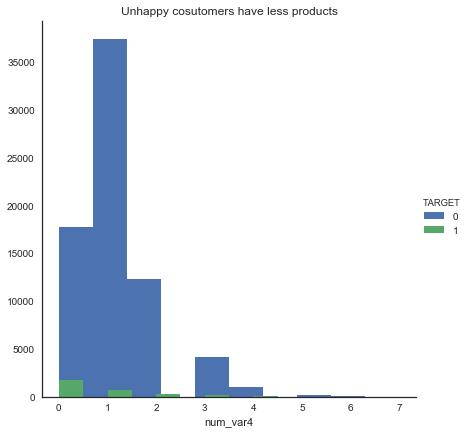

In [10]:
# Let's look at the density of the of happy/unhappy customers in function of the number of bank products
sns.FacetGrid(train, hue="TARGET", size=6) \
   .map(plt.hist, "num_var4") \
   .add_legend()
plt.title('Unhappy cosutomers have less products')
plt.show()

In [11]:
train[train.TARGET==1].num_var4.hist(bins=6)
plt.title('Amount of unhappy customers in function of the number of products');

# Var38
var38 is important according to XGBOOST
see https://www.kaggle.com/cast42/santander-customer-satisfaction/xgboost-with-early-stopping/files

Also RFC thinks var38 is important
see https://www.kaggle.com/tks0123456789/santander-customer-satisfaction/data-exploration/notebook

Var38 is suspected to be the mortage value with the bank. If the mortage is with another bank the national
average is used. 
See https://www.kaggle.com/c/santander-customer-satisfaction/forums/t/19895/var38-is-mortgage-value

[dmi3kno](https://www.kaggle.com/dmi3kno) says that var38 is value of the customer: [https://www.kaggle.com/cast42/santander-customer-satisfaction/exploring-features/comments#115223](https://www.kaggle.com/cast42/santander-customer-satisfaction/exploring-features/comments#115223)

In [12]:
train.var38.describe()

count    7.602000e+04
mean     1.172358e+05
std      1.826646e+05
min      5.163750e+03
25%      6.787061e+04
50%      1.064092e+05
75%      1.187563e+05
max      2.203474e+07
Name: var38, dtype: float64

In [13]:
# How is var38 looking when customer is unhappy ?
train.loc[train['TARGET']==1, 'var38'].describe()

count    3.008000e+03
mean     9.967828e+04
std      1.063098e+05
min      1.113663e+04
25%      5.716094e+04
50%      8.621997e+04
75%      1.173110e+05
max      3.988595e+06
Name: var38, dtype: float64

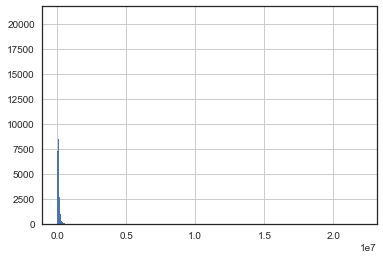

In [18]:
# Histogram for var 38 is not normal distributed
train.var38.hist(bins=1000);

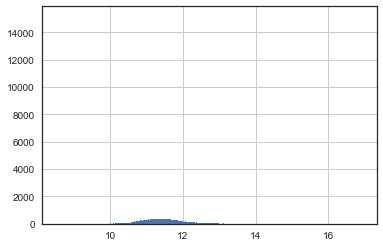

In [19]:
train.var38.map(np.log).hist(bins=1000);

In [20]:
# where is the spike between 11 and 12  in the log plot ?
train.var38.map(np.log).mode()

0    11.672584
dtype: float64

In [21]:
# What are the most common values for var38 ?
train.var38.value_counts()

117310.979016    14868
451931.220000       16
463625.160000       12
288997.440000       11
104563.800000       11
236690.340000        8
329603.970000        7
104644.410000        7
67088.310000         7
125722.440000        7
128318.520000        7
97639.560000         6
100466.730000        6
70813.800000         6
163432.470000        6
168733.620000        6
105260.880000        6
185385.690000        6
85814.040000         5
235476.720000        5
121603.020000        5
93037.680000         5
63820.890000         5
33184.020000         5
126065.040000        5
71302.530000         5
208961.790000        5
171932.700000        5
131353.470000        5
127141.500000        5
                 ...  
59680.710000         1
46170.180000         1
75729.810000         1
92730.750000         1
98087.700000         1
31312.410000         1
151944.720000        1
49222.200000         1
46682.640000         1
79753.740000         1
217717.530000        1
156462.240000        1
140446.5900

the value 117310.979016 appears 14868 times in colum var38

In [22]:
# the most common value is very close to the mean of the other values
train.var38[train['var38'] != 117310.979016494].mean()

117217.5333084768

In [24]:
# what if we exclude the most common value
train.loc[~np.isclose(train.var38, 117310.979016), 'var38'].value_counts()

451931.22    16
463625.16    12
288997.44    11
104563.80    11
236690.34     8
67088.31      7
125722.44     7
128318.52     7
104644.41     7
329603.97     7
105260.88     6
97639.56      6
168733.62     6
185385.69     6
70813.80      6
100466.73     6
163432.47     6
121603.02     5
126065.04     5
185784.72     5
131353.47     5
85814.04      5
83174.28      5
227397.72     5
229351.65     5
208961.79     5
192920.76     5
63820.89      5
71302.53      5
127141.50     5
             ..
44652.87      1
145842.48     1
72912.24      1
130840.20     1
140825.16     1
43512.54      1
76419.75      1
45131.22      1
151250.37     1
105473.79     1
114203.55     1
267128.67     1
64010.01      1
147754.38     1
72751.74      1
94550.37      1
73657.20      1
154776.33     1
72289.59      1
91865.67      1
75781.11      1
72750.24      1
46205.43      1
176834.07     1
25224.75      1
384796.59     1
108436.56     1
41489.49      1
90218.19      1
153559.74     1
Name: var38, dtype: int6

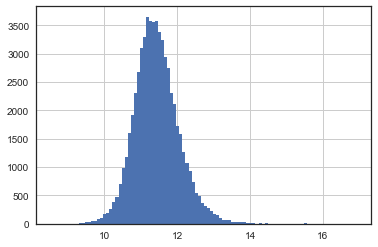

In [25]:
# Look at the distribution
train.loc[~np.isclose(train.var38, 117310.979016), 'var38'].map(np.log).hist(bins=100);

In [26]:
# Above plot suggest we split up var38 into two variables
# var38mc == 1 when var38 has the most common value and 0 otherwise
# logvar38 is log transformed feature when var38mc is 0, zero otherwise
train['var38mc'] = np.isclose(train.var38, 117310.979016)
train['logvar38'] = train.loc[~train['var38mc'], 'var38'].map(np.log)
train.loc[train['var38mc'], 'logvar38'] = 0

In [27]:
#Check for nan's
print('Number of nan in var38mc', train['var38mc'].isnull().sum())
print('Number of nan in logvar38',train['logvar38'].isnull().sum())

Number of nan in var38mc 0
Number of nan in logvar38 0


# var15

The most important feature for XGBoost is var15. According to [a Kaggle form post](https://www.kaggle.com/c/santander-customer-satisfaction/forums/t/19291/data-dictionary/110414#post110414)
    var15 is the age of the customer. Let's explore var15

In [28]:
train['var15'].describe()

count    76020.000000
mean        33.212865
std         12.956486
min          5.000000
25%         23.000000
50%         28.000000
75%         40.000000
max        105.000000
Name: var15, dtype: float64

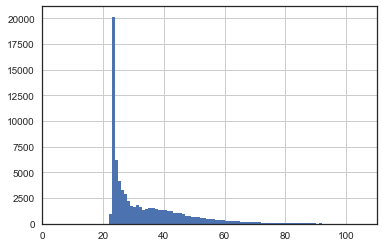

In [29]:
#Looks more normal, plot the histogram
train['var15'].hist(bins=100);

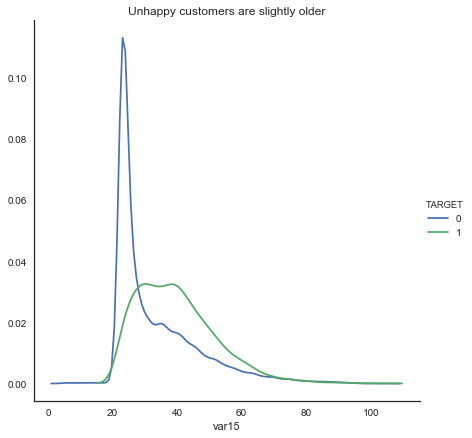

In [30]:
# Let's look at the density of the age of happy/unhappy customers
sns.FacetGrid(train, hue="TARGET", size=6) \
   .map(sns.kdeplot, "var15") \
   .add_legend()
plt.title('Unhappy customers are slightly older');

# saldo_var30

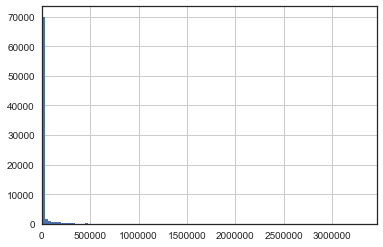

In [31]:
train.saldo_var30.hist(bins=100)
plt.xlim(0, train.saldo_var30.max());

In [32]:
# improve the plot by making the x axis logarithmic
train['log_saldo_var30'] = train.saldo_var30.map(np.log)

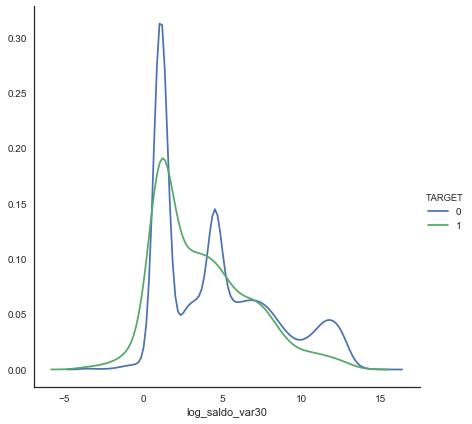

In [33]:
# Let's look at the density of the age of happy/unhappy customers for saldo_var30
sns.FacetGrid(train, hue="TARGET", size=6) \
   .map(sns.kdeplot, "log_saldo_var30") \
   .add_legend();

# Explore the interaction between var15 (age) and var38

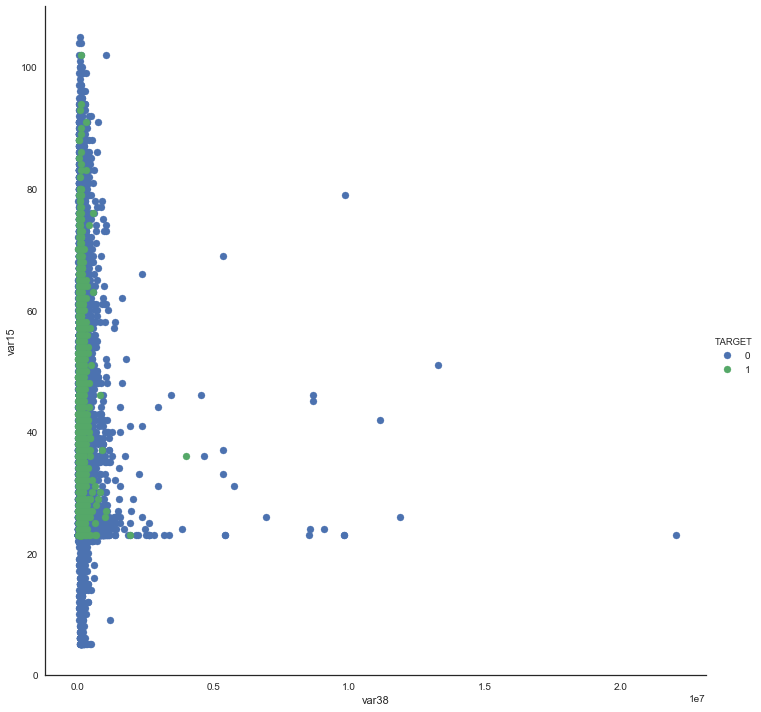

In [34]:
sns.FacetGrid(train, hue="TARGET", size=10) \
   .map(plt.scatter, "var38", "var15") \
   .add_legend();

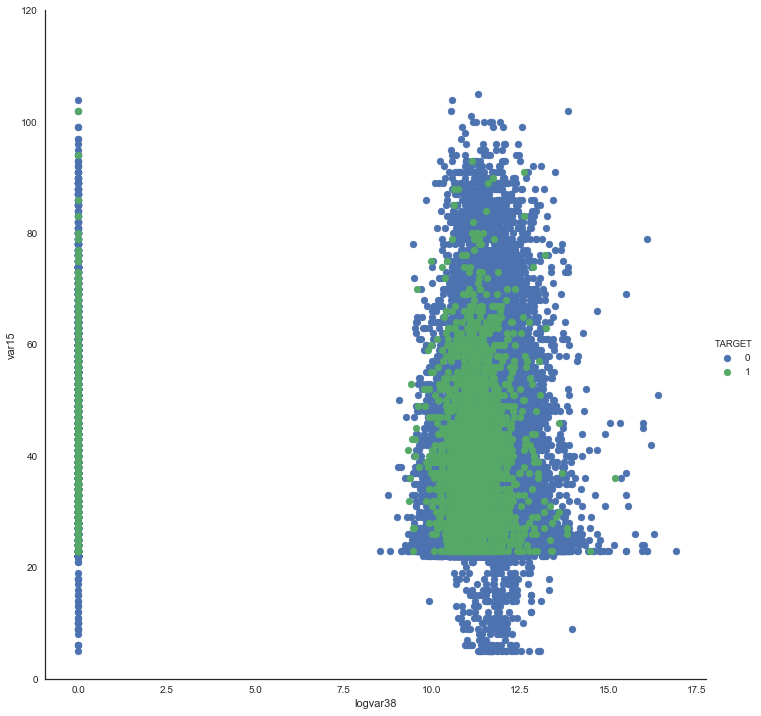

In [35]:
sns.FacetGrid(train, hue="TARGET", size=10) \
   .map(plt.scatter, "logvar38", "var15") \
   .add_legend()
plt.ylim([0,120]); # Age must be positive ;-)

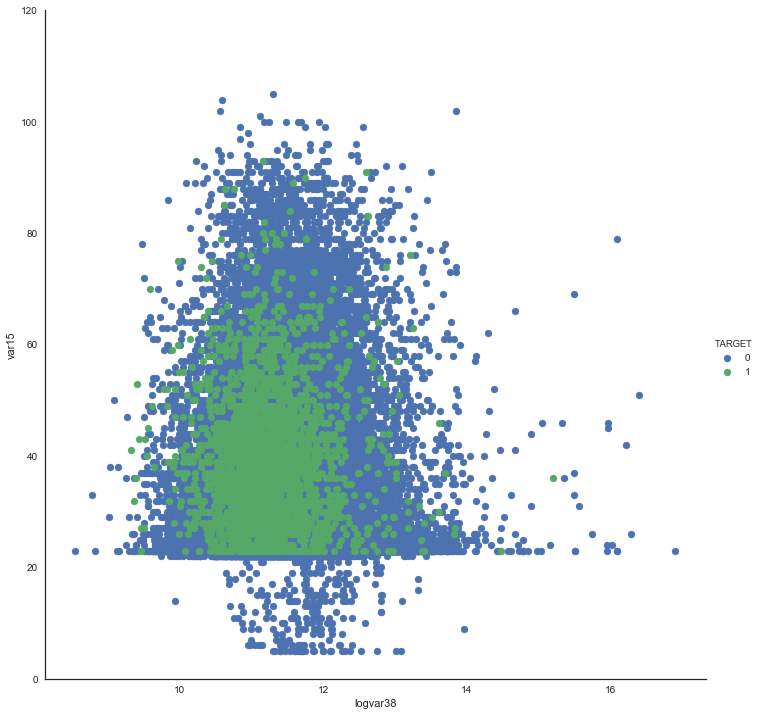

In [36]:
# Exclude most common value for var38 
sns.FacetGrid(train[~train.var38mc], hue="TARGET", size=10) \
   .map(plt.scatter, "logvar38", "var15") \
   .add_legend()
plt.ylim([0,120]);

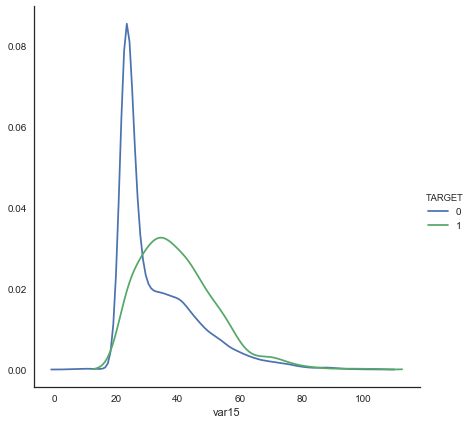

In [37]:
# What is distribution of the age when var38 has it's most common value ?
sns.FacetGrid(train[train.var38mc], hue="TARGET", size=6) \
   .map(sns.kdeplot, "var15") \
   .add_legend();

KeyError: "['n0'] not in index"

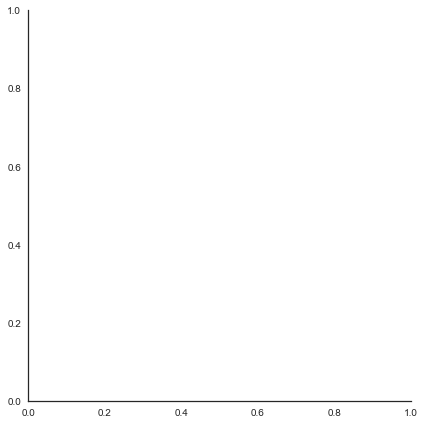

In [39]:
# What is density of n0 ?
sns.FacetGrid(train, hue="TARGET", size=6) \
   .map(sns.kdeplot, "n0") \
   .add_legend()
plt.title('Unhappy customers have a lot of features that are zero');

# Select the most important features

In [40]:
from sklearn.feature_selection import SelectPercentile
from sklearn.feature_selection import f_classif,chi2
from sklearn.preprocessing import Binarizer, scale

# First select features based on chi2 and f_classif
p = 3

X_bin = Binarizer().fit_transform(scale(X))
selectChi2 = SelectPercentile(chi2, percentile=p).fit(X_bin, y)
selectF_classif = SelectPercentile(f_classif, percentile=p).fit(X, y)

chi2_selected = selectChi2.get_support()
chi2_selected_features = [ f for i,f in enumerate(X.columns) if chi2_selected[i]]
print('Chi2 selected {} features {}.'.format(chi2_selected.sum(),
   chi2_selected_features))
f_classif_selected = selectF_classif.get_support()
f_classif_selected_features = [ f for i,f in enumerate(X.columns) if f_classif_selected[i]]
print('F_classif selected {} features {}.'.format(f_classif_selected.sum(),
   f_classif_selected_features))
selected = chi2_selected & f_classif_selected
print('Chi2 & F_classif selected {} features'.format(selected.sum()))
features = [ f for f,s in zip(X.columns, selected) if s]
print (features)

Chi2 selected 12 features ['var15', 'ind_var5', 'ind_var8_0', 'ind_var30', 'num_var5', 'num_var8_0', 'num_var30_0', 'num_var30', 'num_var42', 'saldo_var30', 'var36', 'num_meses_var5_ult3'].
F_classif selected 12 features ['var15', 'ind_var5', 'ind_var8_0', 'ind_var30', 'num_var4', 'num_var5', 'num_var30', 'num_var35', 'num_var42', 'var36', 'num_meses_var5_ult3', 'n0'].
Chi2 & F_classif selected 9 features
['var15', 'ind_var5', 'ind_var8_0', 'ind_var30', 'num_var5', 'num_var30', 'num_var42', 'var36', 'num_meses_var5_ult3']


In [41]:
# Make a dataframe with the selected features and the target variable
X_sel = train[features+['TARGET']]

# var36

In [42]:
X_sel['var36'].value_counts()

99    30064
3     22177
1     14664
2      8704
0       411
Name: var36, dtype: int64

var36 is most of the times 99 or [0,1,2,3]

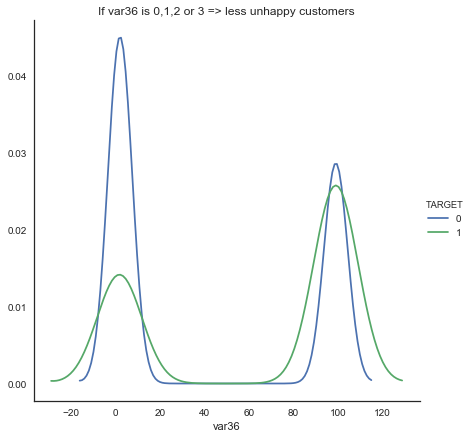

In [43]:
# Let's plot the density in function of the target variabele
sns.FacetGrid(train, hue="TARGET", size=6) \
   .map(sns.kdeplot, "var36") \
   .add_legend()
plt.title('If var36 is 0,1,2 or 3 => less unhappy customers');

In above plot we see that the density of unhappy custormers is lower when var36 is not 99

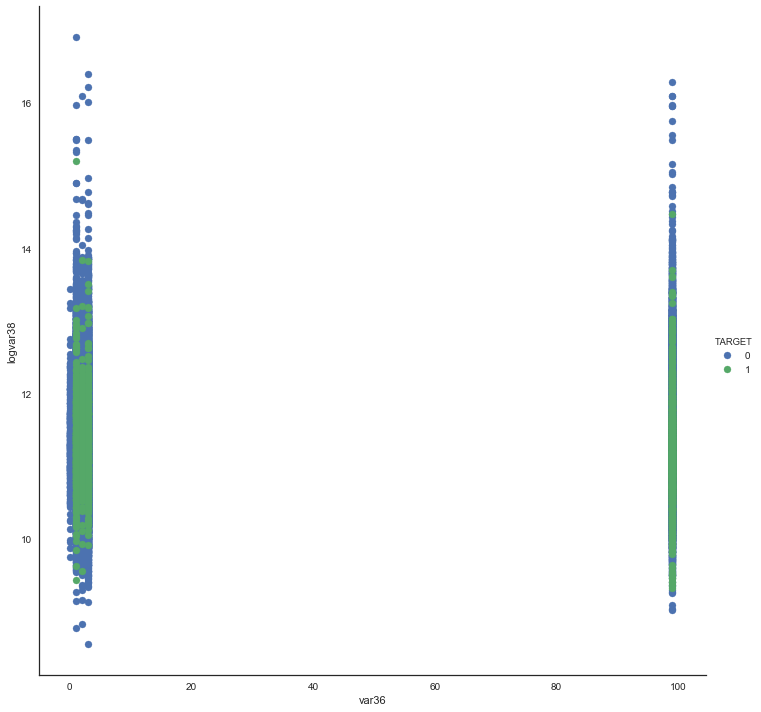

In [44]:
# var36 in function of var38 (most common value excluded) 
sns.FacetGrid(train[~train.var38mc], hue="TARGET", size=10) \
   .map(plt.scatter, "var36", "logvar38") \
   .add_legend();

Let's seperate that in two plots

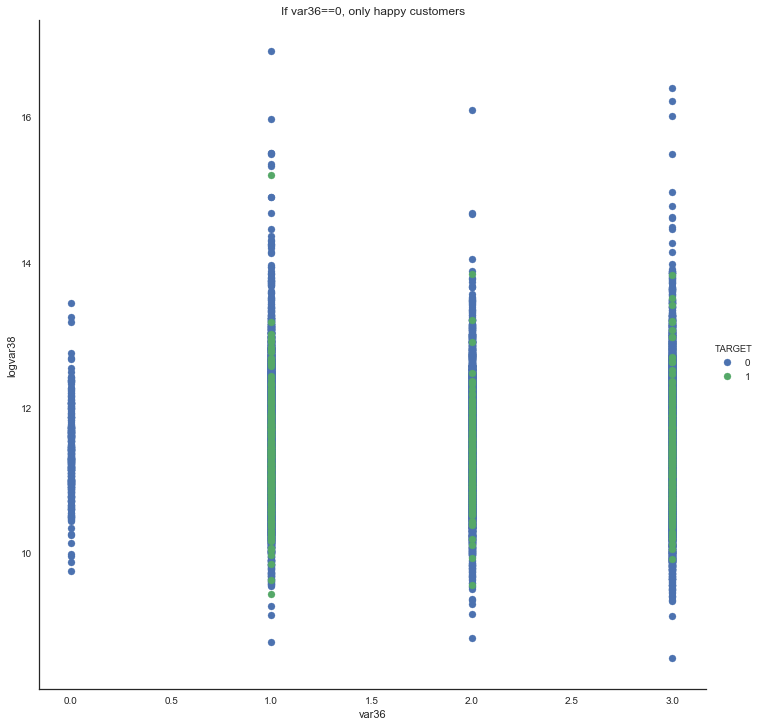

In [45]:
sns.FacetGrid(train[(~train.var38mc) & (train.var36 < 4)], hue="TARGET", size=10) \
   .map(plt.scatter, "var36", "logvar38") \
   .add_legend()
plt.title('If var36==0, only happy customers');

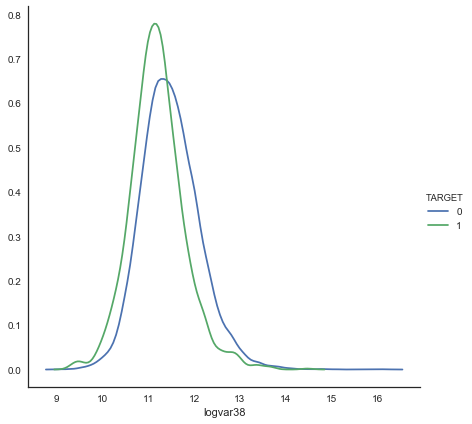

In [46]:
# Let's plot the density in function of the target variabele, when var36 = 99
sns.FacetGrid(train[(~train.var38mc) & (train.var36 ==99)], hue="TARGET", size=6) \
   .map(sns.kdeplot, "logvar38") \
   .add_legend();

# num_var5

In [47]:
train.num_var5.value_counts()

3     50265
0     25561
6       190
9         3
15        1
Name: num_var5, dtype: int64

In [48]:
train[train.TARGET==1].num_var5.value_counts()

0    1959
3    1042
6       7
Name: num_var5, dtype: int64

In [49]:
train[train.TARGET==0].num_var5.value_counts()

3     49223
0     23602
6       183
9         3
15        1
Name: num_var5, dtype: int64

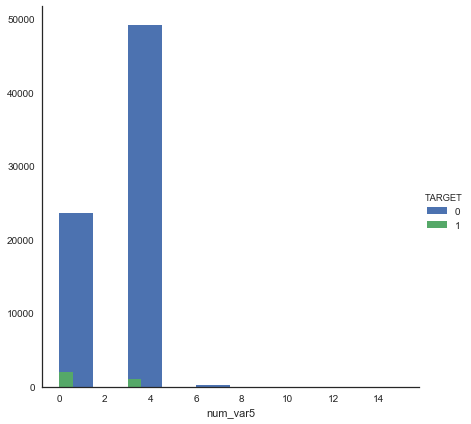

In [50]:
sns.FacetGrid(train, hue="TARGET", size=6) \
   .map(plt.hist, "num_var5") \
   .add_legend();

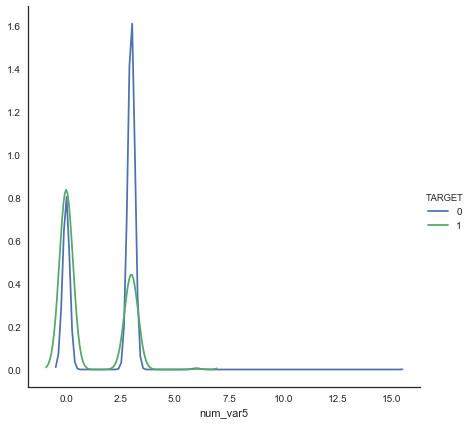

In [51]:
sns.FacetGrid(train, hue="TARGET", size=6) \
   .map(sns.kdeplot, "num_var5") \
   .add_legend();

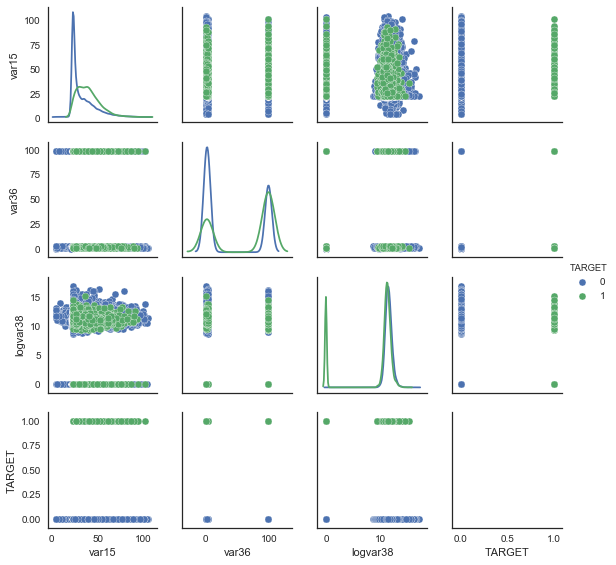

In [52]:
sns.pairplot(train[['var15','var36','logvar38','TARGET']], hue="TARGET", size=2, diag_kind="kde");

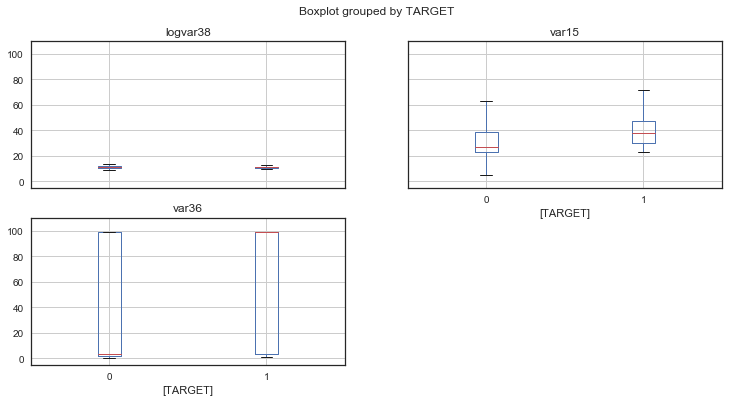

In [53]:
train[['var15','var36','logvar38','TARGET']].boxplot(by="TARGET", figsize=(12, 6));

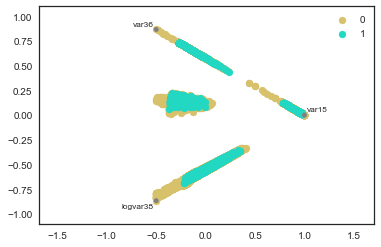

In [54]:
# A final multivariate visualization technique pandas has is radviz
# Which puts each feature as a point on a 2D plane, and then simulates
# having each sample attached to those points through a spring weighted
# by the relative value for that feature
from pandas.tools.plotting import radviz
radviz(train[['var15','var36','logvar38','TARGET']], "TARGET");

# now look at all 8 features together

In [55]:
features

['var15',
 'ind_var5',
 'ind_var8_0',
 'ind_var30',
 'num_var5',
 'num_var30',
 'num_var42',
 'var36',
 'num_meses_var5_ult3']

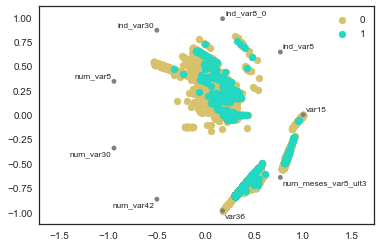

In [56]:
radviz(train[features+['TARGET']], "TARGET");

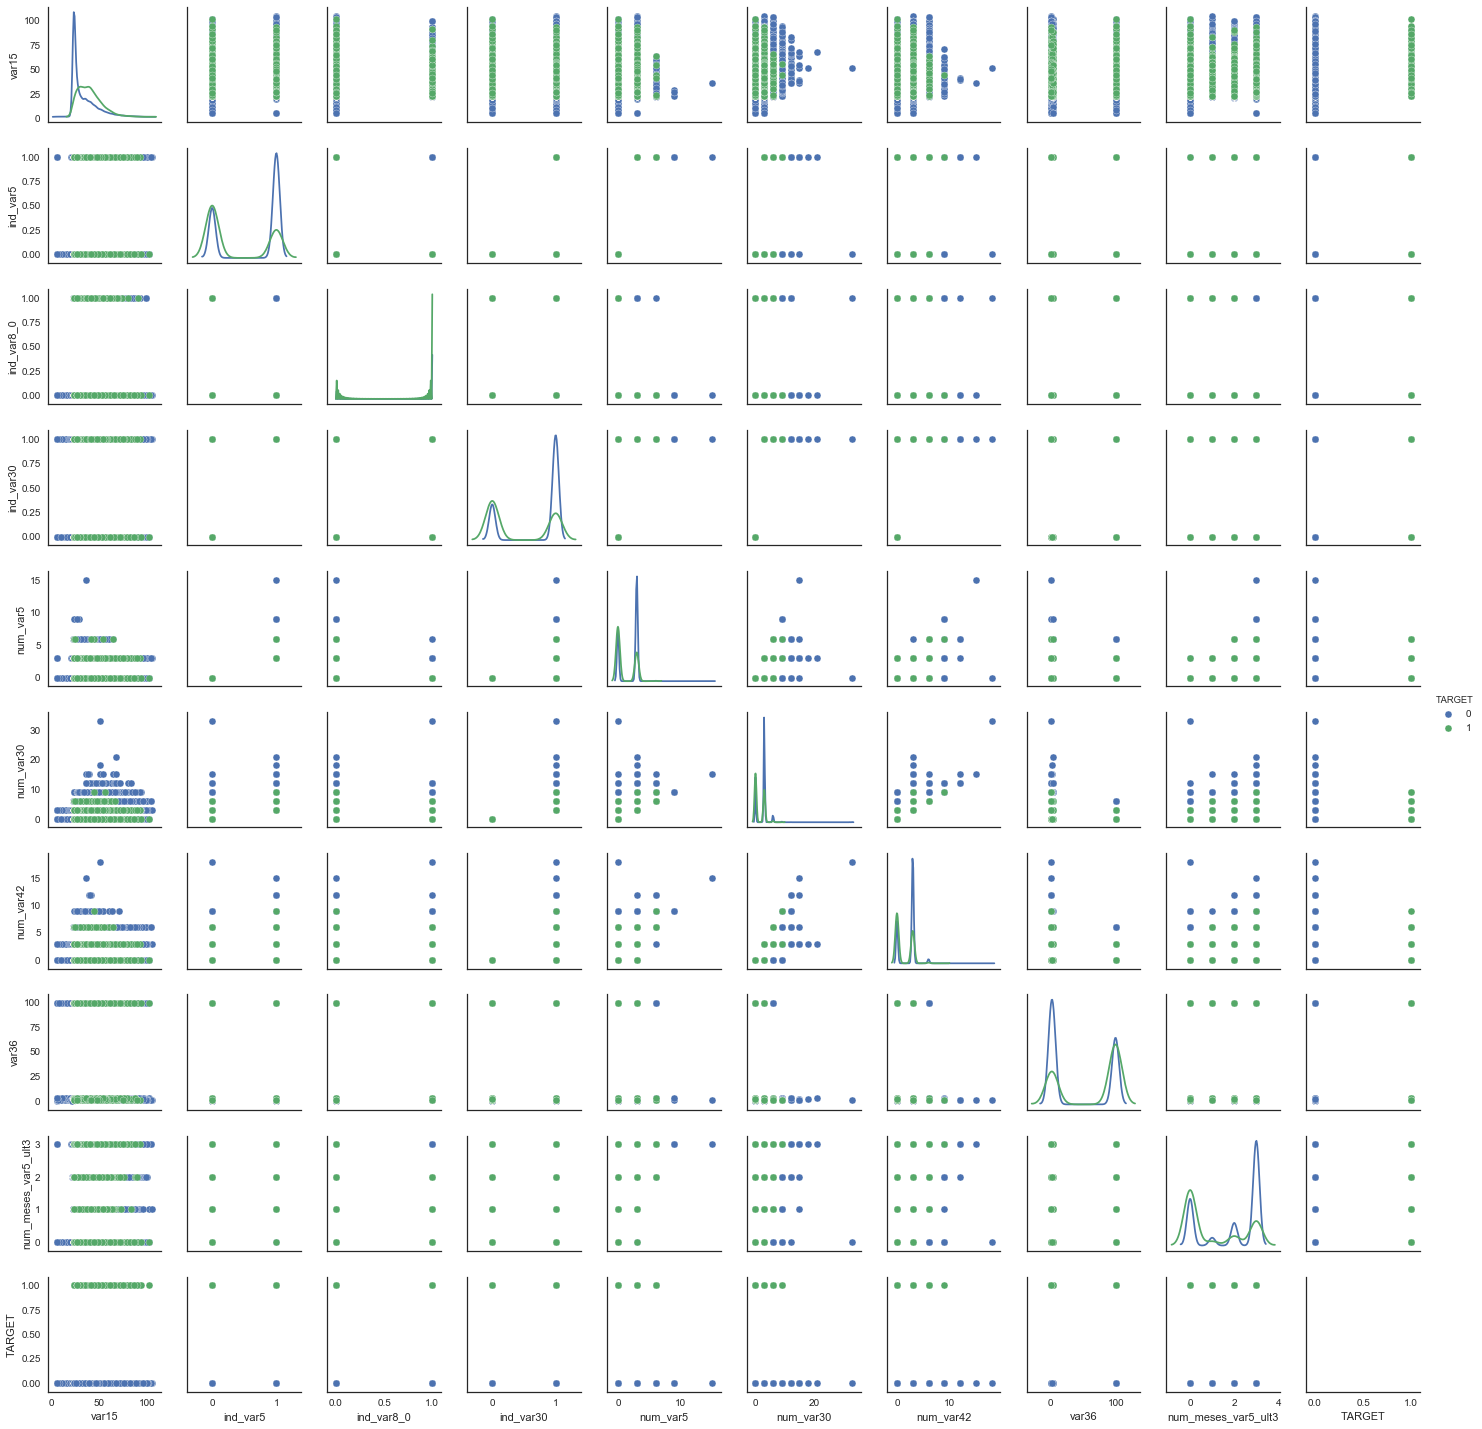

In [57]:
sns.pairplot(train[features+['TARGET']], hue="TARGET", size=2, diag_kind="kde");

# Correlations

In [58]:
cor_mat = X.corr()

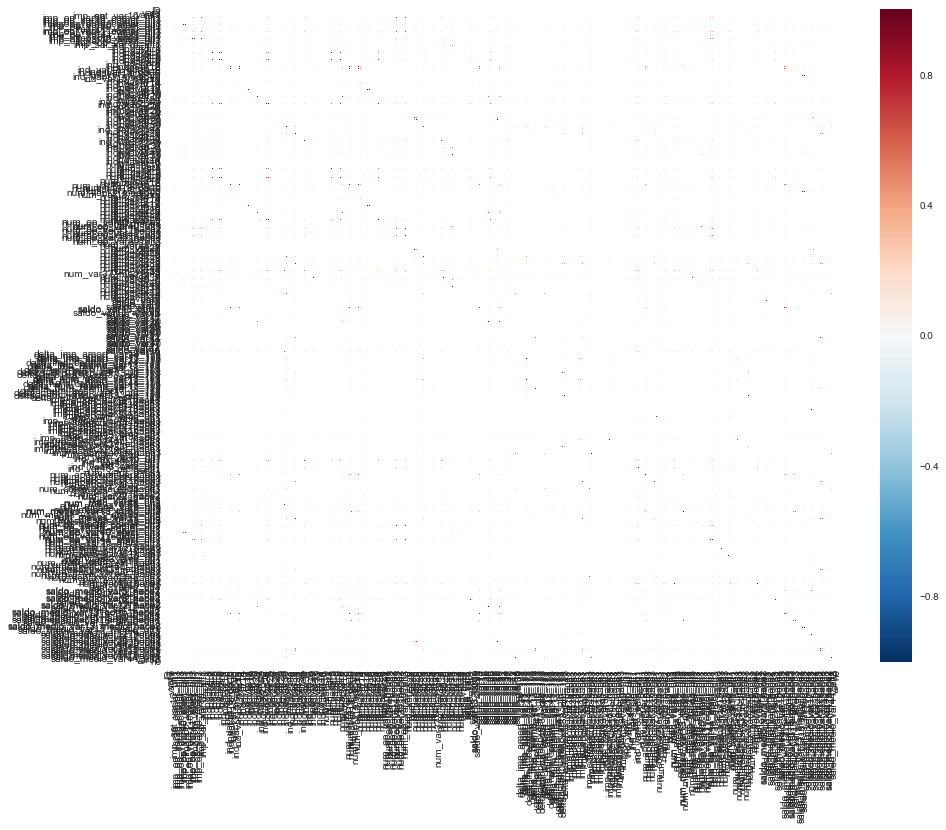

In [59]:
f, ax = plt.subplots(figsize=(15, 12))
# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(cor_mat,linewidths=.5, ax=ax);

In [63]:
cor_mat = X_sel.corr()

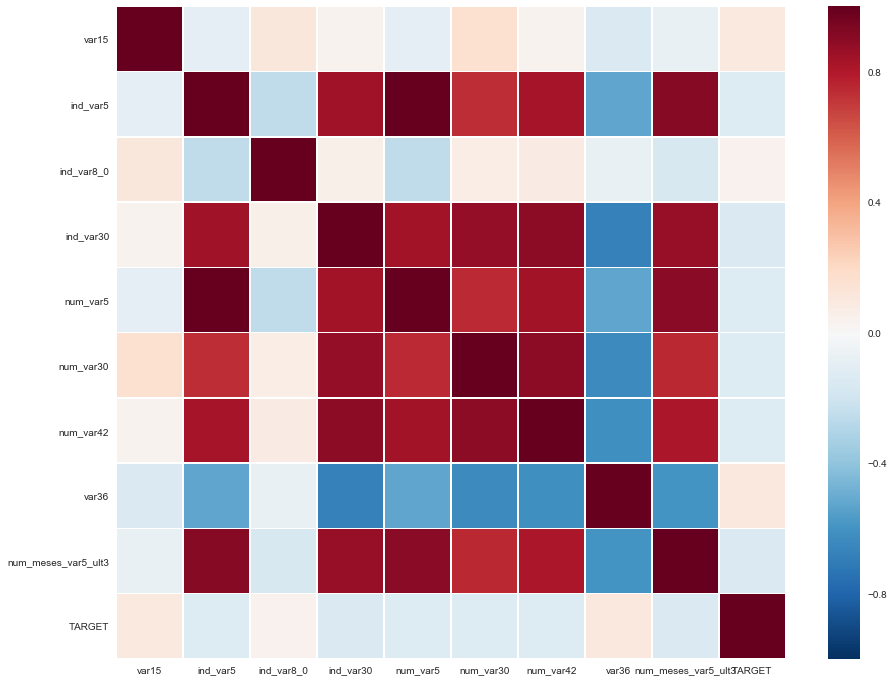

In [64]:
f, ax = plt.subplots(figsize=(15, 12))
# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(cor_mat,linewidths=.5, ax=ax);

In [65]:
# only important correlations and not auto-correlations
threshold = 0.7
important_corrs = (cor_mat[abs(cor_mat) > threshold][cor_mat != 1.0]) \
    .unstack().dropna().to_dict()
unique_important_corrs = pd.DataFrame(
    list(set([(tuple(sorted(key)), important_corrs[key]) \
    for key in important_corrs])), columns=['attribute pair', 'correlation'])
# sorted by absolute value
unique_important_corrs = unique_important_corrs.ix[
    abs(unique_important_corrs['correlation']).argsort()[::-1]]
unique_important_corrs

,attribute pair,correlation
10,"(ind_var5, num_var5)",0.993709
6,"(ind_var5, num_meses_var5_ult3)",0.908842
5,"(num_meses_var5_ult3, num_var5)",0.903272
1,"(num_var30, num_var42)",0.898119
0,"(ind_var30, num_var42)",0.894182
2,"(ind_var30, num_var30)",0.875812
4,"(ind_var30, num_meses_var5_ult3)",0.869045
11,"(ind_var30, ind_var5)",0.848338
7,"(ind_var30, num_var5)",0.843001
14,"(num_var42, num_var5)",0.839574


# Clusters 

In [66]:
# Recipe from https://github.com/mgalardini/python_plotting_snippets/blob/master/notebooks/clusters.ipynb
import matplotlib.patches as patches
from scipy.cluster import hierarchy
from scipy.stats.mstats import mquantiles
from scipy.cluster.hierarchy import dendrogram, linkage

In [67]:
# Correlate the data
# also precompute the linkage
# so we can pick up the 
# hierarchical thresholds beforehand

from sklearn.preprocessing import scale
from sklearn.preprocessing import StandardScaler

# scale to mean 0, variance 1
train_std = pd.DataFrame(scale(X_sel))
train_std.columns = X_sel.columns
m = train_std.corr()
l = linkage(m, 'ward')

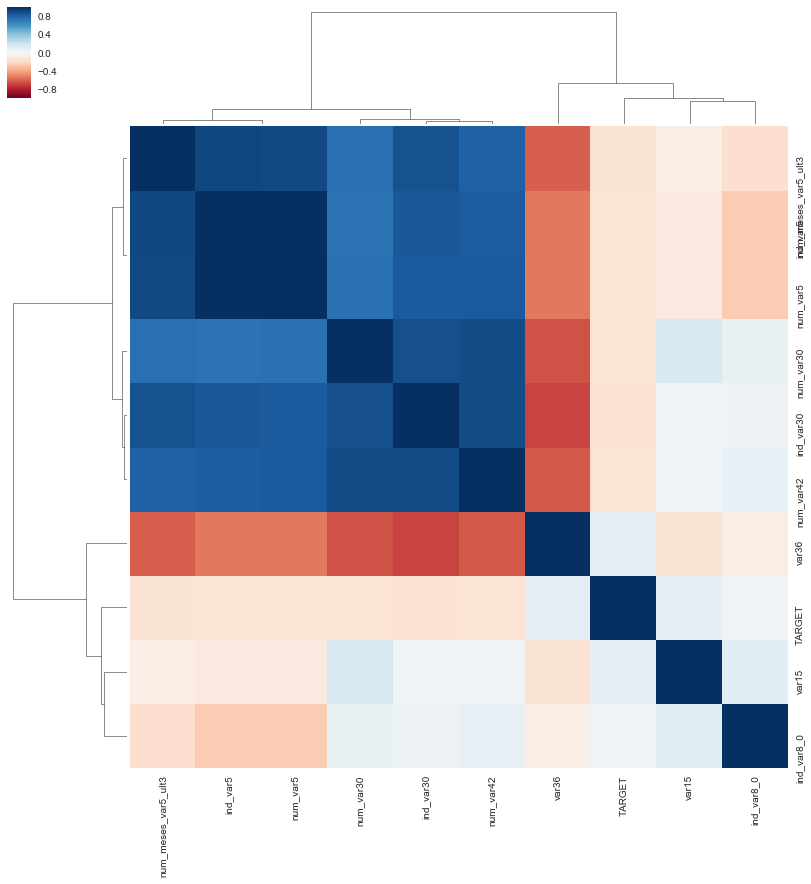

In [68]:
# Plot the clustermap
# Save the returned object for further plotting
mclust = sns.clustermap(m,
               linewidths=0,
               cmap=plt.get_cmap('RdBu'),
               vmax=1,
               vmin=-1,
               figsize=(14, 14),
               row_linkage=l,
               col_linkage=l)

In [69]:
# Threshold 1: median of the
# distance thresholds computed by scipy
t = np.median(hierarchy.maxdists(l))

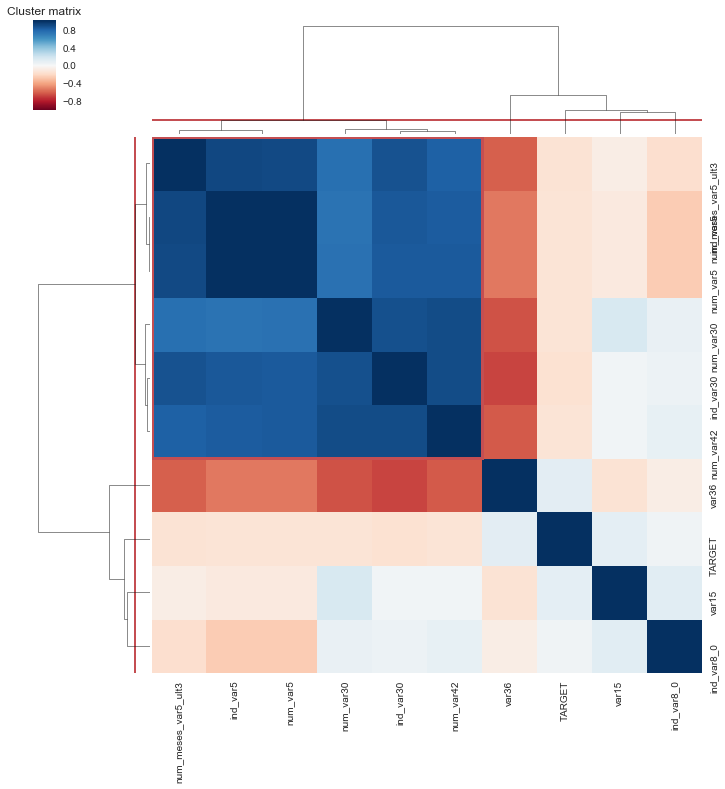

In [70]:
# Plot the clustermap
# Save the returned object for further plotting
mclust = sns.clustermap(m,
               linewidths=0,
               cmap=plt.get_cmap('RdBu'),
               vmax=1,
               vmin=-1,
               figsize=(12, 12),
               row_linkage=l,
               col_linkage=l)

# Draw the threshold lines
mclust.ax_col_dendrogram.hlines(t,
                               0,
                               m.shape[0]*10,
                               colors='r',
                               linewidths=2,
                               zorder=1)
mclust.ax_row_dendrogram.vlines(t,
                               0,
                               m.shape[0]*10,
                               colors='r',
                               linewidths=2,
                               zorder=1)

# Extract the clusters
clusters = hierarchy.fcluster(l, t, 'distance')
for c in set(clusters):
    # Retrieve the position in the clustered matrix
    index = [x for x in range(m.shape[0])
             if mclust.data2d.columns[x] in m.index[clusters == c]]
    # No singletons, please
    if len(index) == 1:
        continue

    # Draw a rectangle around the cluster
    mclust.ax_heatmap.add_patch(
        patches.Rectangle(
            (min(index),
             m.shape[0] - max(index) - 1),
                len(index),
                len(index),
                facecolor='none',
                edgecolor='r',
                lw=3)
        )

plt.title('Cluster matrix')

pass

For clustering with more features, have a look at: [https://www.kaggle.com/cast42/santander-customer-satisfaction/correlation-pairs](https://www.kaggle.com/cast42/santander-customer-satisfaction/correlation-pairs)